# Anime Database ~ Hito 1 ~
#### Grupo 15
Integrantes: Álvaro Morales, Iván Larraín, Ignacio Ancatripai, Felipe Araya

## Introducción y motivación
En este proyecto, se explorarán los datos y estadisticas presentados en la siguiente [Base de datos de MyAnimeList](https://www.kaggle.com/CooperUnion/anime-recommendations-database).



### Contexto
El consumo global de anime (fuera de Japón) ha experimentado un alza considerable durante la década del 2010, impulsado por la creciente facilidad de acceso a series mediante plataformas de streaming (*Crunchyroll, Funimation, Netflix*, etc) que permiten acceder de manera legal a este contenido previamente solo obtenible por tv o sitios web clandestinos. El nivel de integración a la cultura popular de estas series da paso a que exista un número creciente de datos disponibles sobre las series en si así como del público que las consume. Existen diversas plataformas en donde usuarios pueden discutir acerca de estas series, y algunas que permiten que un usuario califique y/o catalogue series según su experiencia personal con estas. Entre estas se encuentra *MyAnimeList*, la cual será la principal fuente de datos de este proyecto.

[*MyAnimeList*](https://myanimelist.net) es una comunidad virtual de catalogación de anime y manga. Al menos en occidente es la más utilizada de su tipo. Proporciona a sus usuarios un sistema basado en listas para organizar y puntuar anime y/o manga que hayan visto y contactar a otros usuarios con gustos similares, todo esto gracias a una base de datos de anime/manga muy amplia. Los usuarios pueden añadir series a sus listas y marcarlas en diversos estados ("visto", "viendo", "pausado", etc), así como otorgarles una puntuación entre 1-10.

Ha existido desde el 2005, puesta en marcha por Garrett Gyssler, y recibe cerca de 120 millones de visitantes al mes.

La base de datos a utilizar contiene información publica obtenida desde este sitio web, y contiene datos sobre miles de series de anime, usuarios y sus listas recopiladas hasta el año 2018. Estos datos son interesantes de analizar pues contemplan un amplio rango de tiempo, géneros (de series) y usuarios; incluyendo información de ratings y popularidad así como datos relevantes de los usuarios (género, fecha de nacimiento, nacionalidad, etc) que permiten realizar un estudio sobre la composición del público que consume anime y a la vez encontrar posibles relaciones entre las series y los usuarios que las ven, así como realizar un análisis temporal del consumo de estas.

## Exploración de datos
Lo siguiente fue sacado direcamente de kaggle:

AnimeList.csv contiene una lista de anime, con título, sinónimos del título, género, estudio, dueño de la licencia, productor, duración, calificación, puntuación, fecha de emisión, episodios, fuente (manga, novela ligera, etc.) y muchos otros datos importantes.

UserList.csv contiene información sobre los usuarios que ven anime, concretamente el nombre de usuario, la fecha de registro (join_date), la última fecha de conexión, la fecha de nacimiento, el sexo, la ubicación y muchos valores agregados de sus listas de anime.

UserAnimeList.csv contiene listas de anime de todos los usuarios. Por cada registro, aquí está el nombre de usuario, el ID del anime, la puntuación, el estado y la fecha de la última actualización de este registro. Este archivo es muy grande, así que no se tocará por ahora (en su versión raw, existen versiones limpias que si se pueden ocupar)

Este dataset (sin preprocesamiento) contiene:

- 302 675 usuarios únicos (302 573 de ellos con algunos datos demográficos)
- 80 076 112 registros en listas de anime
- 46 358 322 de ellos tienen valoraciones
- 14 478 animes únicos

También se incluyen datos "limpios" en anime_cleaned.csv, animelists_cleaned.csv y users_cleaned.csv. Esta versión limpiada ha truncado a todos los usuarios con un número ridículamente grande de episodios en animes que no tienen tantos episodios, los episodios vistos más grandes que el número de episodios en un anime individual fueron arreglados y los episodios vistos y el watchtime fue recalculado. Para algunos usuarios, la última vez que se conectaron fue en el año 1900, u otros valores extraños, por lo que su última actividad se dedujo de su última marca de tiempo de actualización de la lista de animes.

Muchos usuarios rellenaron incorrectamente el número de episodios vistos o repetidos. En el caso de los animes en los que se han visto más episodios de los que tiene el anime, los episodios vistos se han reescrito como número de episodios de ese anime. El tiempo de visionado y el número de episodios vistos se han corregido en consecuencia.
Los usuarios demasiado jóvenes y demasiado viejos, obviamente, se han truncado también.

Habían 6 usuarios con sospechosamente muchos episodios vistos. Fueron truncados, son muy pocos usuarios para afectar a las estadísticas.

### Verifiquemos algunas de estas aseveraciones.

A continuación, comprobaremos algunas de las cosas que asegura el análisis hecho por los autores de este dataset.

UserAnimeList.csv pesa >5GB, y sus versiones filtradas >2GB c/u. Por esto, ignoraremos las versiones raw y filtered. Compararemos las otras para verificar el análisis hecho por los autores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [321]:
# Raw ~5 GB
# user_animelist = pd.read_csv('database/UserAnimeList.csv') -> Este ocupa mucho espacio (>5GB) asi que se saltará.
user_list = pd.read_csv('database/UserList.csv')
anime_list = pd.read_csv('database/AnimeList.csv')

# Datos limpios ~2GB
animelists_cleaned = pd.read_csv('database/animelists_cleaned.csv')
users_cleaned = pd.read_csv('database/users_cleaned.csv')
anime_cleaned = pd.read_csv('database/anime_cleaned.csv')

In [281]:
# tamaños
print("fyi: (rows, columns)")
print(f"user_list: {user_list.shape}")
print(f"anime_list: {anime_list.shape}")
print(f"animelists_cleaned: {animelists_cleaned.shape}")
print(f"users_cleaned: {users_cleaned.shape}")
print(f"anime_cleaned: {anime_cleaned.shape}")

fyi: (rows, columns)
user_list: (302675, 17)
anime_list: (14478, 31)
animelists_cleaned: (31284030, 11)
users_cleaned: (108711, 17)
anime_cleaned: (6668, 33)


In [8]:
animelists_cleaned.info(verbose=False) # listas de anime de los usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Columns: 11 entries, username to my_tags
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


In [5]:
users_cleaned.info() # info de los usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   location                  108706 non-null  object 
 10  birth_date                108711 non-null  object 
 11  access_rank               0 non-null       float64
 12  join_date                 108711 non-null  object 
 13  last_online               108711 non-null  o

In [18]:
# ^^^ como todos los campos no nulos son exactamente la cantidad de filas (con algunas excepciones), parece que la limpieza fue bien hecha.
# interesantenemte, hay un usuario con nombre null:
users_cleaned[users_cleaned["username"].isnull()]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
51311,NaN,300142,12,158,8,21,62,39.304167,Male,Serbia,1996-12-30 00:00:00,NaN,2010-03-01 00:00:00,2018-05-20 04:06:06,6.58,30.0,2524


En el dataset de usuarios se encuentra que había una fila en donde username era null. Esto en un comienzo parece ser un dato erróneo pero se decide investigar.
Se pudo encontrar a este usuario con la siguiente URL incluyendo su id: [https://myanimelist.net/comments.php?id=300142](https://myanimelist.net/comments.php?id=300142). Su nombre, efectivamente es [null](https://myanimelist.net/profile/null). Esto produjo que al leer el archivo .csv se tomara como NaN.

In [7]:
anime_cleaned.info(verbose=False) # info de los anime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Columns: 33 entries, anime_id to aired_from_year
dtypes: bool(1), float64(4), int64(6), object(22)
memory usage: 1.6+ MB


El creador del dataset menciona que hay 6 usuarios con un número excesivamente alto de episodios.

<AxesSubplot:title={'center':'Usuarios por número de episodios vistos'}, xlabel='user_id', ylabel='stats_episodes'>

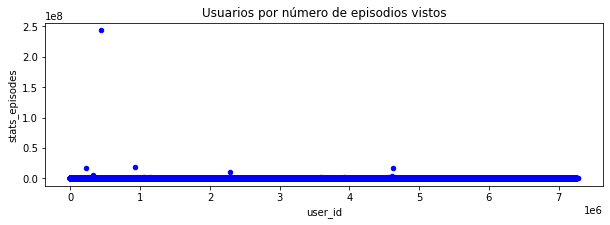

In [10]:
# Veremos a los usuarios por número de episodios vistos
user_list[['username','stats_episodes']].sort_values('stats_episodes', ascending=False).head(10)
# Graficar usuarios por numero de episodios vistos
user_list.plot.scatter(x='user_id', y='stats_episodes', xlabel="Usuario", ylabel="Episodios vistos", color="blue", figsize= (10,3), title='Usuarios por número de episodios vistos')

Se pueden ver a simple vista al menos 6 puntos con una cantidad excesivamente mayor al resto. El más alejado es interesante, corresponde al usuario con mayor cantidad de episodios vistos.

In [17]:
# Obtenemos al usuario con mayor cantidad de episodios
user_list[user_list['stats_episodes'] == user_list['stats_episodes'].max()]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
45081,warrose,443232,35,2034,0,1,7,2601351.02,Male,San Luis,1994-01-21,NaN,2011-02-01,2014-12-28 21:54:00,1.01,0.0,243794881.0


Este usuario aparentemente ha visto 243.794.881 episodios en total. Si se accede a su [perfil](https://myanimelist.net/animelist/warrose?status=7&order=4&order2=0) en el sitio web es posible notar con que sus datos son muy probablemente falsos (todas las series con el mismo puntaje, algunas con un número imposiblemente grande de episodios). Esta clase de datos no aportan al dataset y por esa razón son eliminados por el autor para las versiones *clean*.

In [19]:
# Vamos a renombrar el usuario con nombre null a "null"
users_cleaned.loc[users_cleaned["username"].isnull(), "username"] = "null"
# Obtenemos nuevamente al usuario con nombre "null"
users_cleaned[users_cleaned["username"] == "null"]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
51311,null,300142,12,158,8,21,62,39.304167,Male,Serbia,1996-12-30 00:00:00,NaN,2010-03-01 00:00:00,2018-05-20 04:06:06,6.58,30.0,2524


Se puede obtener de los datos actuales los géneros más populares de anime, por dos criterios:
Primero, los géneros más populares por número de series producidas de ese género.
Segundo, según cuántas personas tienen estos animes en sus listas de anime. Para tener resultados más precisos se consideran solo aquellos usuarios que tengan estos animes en estados "completed" (2) o "watching" (1), pues un uso común de páginas como *MyAnimeList* es marcar animes que el usuario desea ver pero no necesariamente ha visto aún.

In [259]:
# Obtenemos los generos y contamos sus apariciones.
anime_genres_by_anime = anime_cleaned["genre"].str.split(", ", expand=True).stack().value_counts(dropna=False)


In [253]:
# Anime lists con animes en estado 1 o 2
animelists_watched_completed = animelists_cleaned[(animelists_cleaned["my_status"] == 1) | (animelists_cleaned["my_status"] == 2)]

# Obtenemos el id y genero de los animes
anime_genres_only = anime_cleaned[["anime_id", "genre"]]
# Unimos los dos dataframes
animelists_watched_completed = animelists_watched_completed.merge(anime_genres_only, on="anime_id")
animelists_watched_completed.head()
# Obtenemos los generos y contamos sus apariciones.
anime_genres_by_lists = animelists_watched_completed["genre"].str.split(", ", expand=True).stack().value_counts(dropna=False)

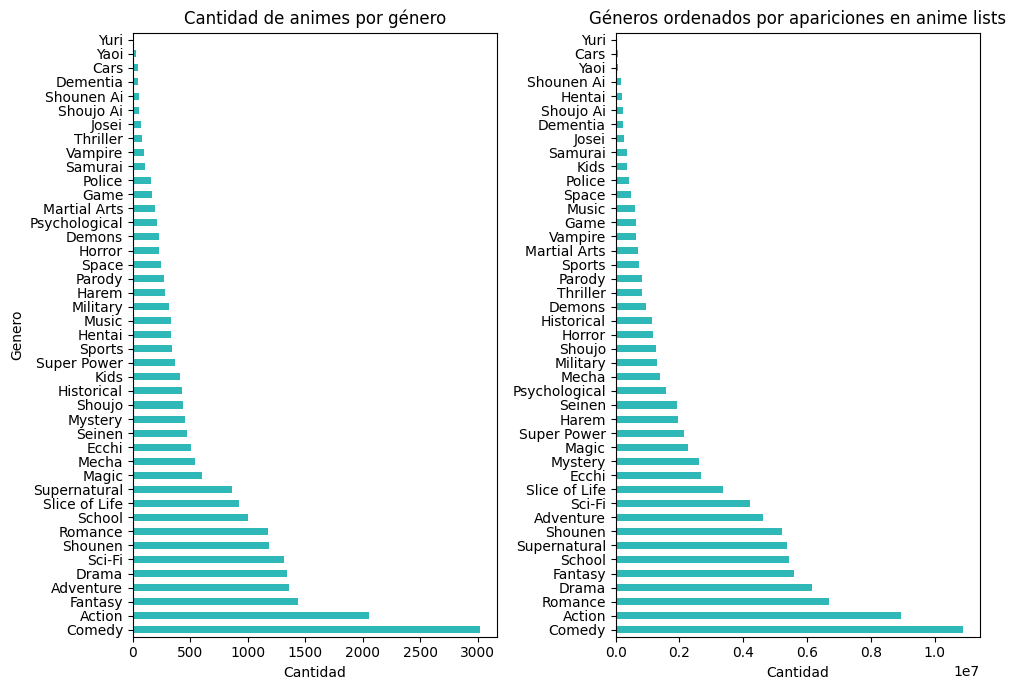

In [279]:
# Graficamos los generos
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
anime_genres_by_anime.plot.barh(xlabel="Cantidad", ylabel="Genero", title="Cantidad de animes por género", figsize=(10, 7), ax=ax1, color='#2EB8B8')
anime_genres_by_lists.plot.barh(xlabel="Cantidad", title="Géneros ordenados por apariciones en anime lists", figsize=(10, 7), ax=ax2, color='#2EB8B8')
# tight layout to avoid overlapping
plt.tight_layout()

Del gráfico de la izquierda se puede desprender que los animes más producidos son los de género comedia, seguido por acción y fantasía.

Del gráfico de la derecha se desprende que los géneros más vistos siguen siendo comedia y acción, pero el tercer puesto pasa a ser ocupado por el género de romance, y el anterior tercer puesto (fantasía) baja al 5to puesto. Esto puede indicar que el género de romance tiene una audiencia mayor a pesar de que es menos producido que el género de fantasía. Y no es el único, a pesar de que en la mayoria de géneros coincide la cantidad de animes producidos con la popularidad, hay varios casos en donde no calzan como se esperaría.

¿Por que pasa esto? Es una pregunta interesante. Tal vez la gente que ocupa MAL, no necesariamente representa a la mayoría de consumidores de anime. Se podría deducir que los usuarios de MAL, en cierta forma, comparten algunos gustos, que difieren en algunos géneros de el total de consumidores occidentales de anime. Tal vez existen ciertos géneros (como géneros de anime para adultos) que los usuarios prefieren no agregar a sus listas, pues estas son públicas.

Vale destacar que MAL es ocupado por audiencias principalmente occidentales, y los estudios de anime están más interesados en la popularidad en Japón. Puede que allá calzen mejor las estadísticas.

Además, solo viendo los totales, no estamos considerando fechas de emisión o de vista. Es posible que estas disparidades se deban a que algunos géneros no eran muy populares antiguamente, pero tuvieron un boom importante en popularidad a partir de alguna fecha (o viceversa), lo cual podría resultar en una gran cantidad de anime de ciertos géneros, que no fueron muy populares en su época, pero que explotaron en popularidad más recientemente (o viceversa), después de la creación de MAL, en donde usuarios expresaron ésta nueva popularidad.

Otro análisis interesante de realizar es un análisis temporal del anime.
Si se agrupan los animes por su año de producción (año en que comienzan a emitirse), se obtiene el siguiente gráfico:

<AxesSubplot: title={'center': 'Cantidad de animes por año'}, xlabel='Año', ylabel='Cantidad'>

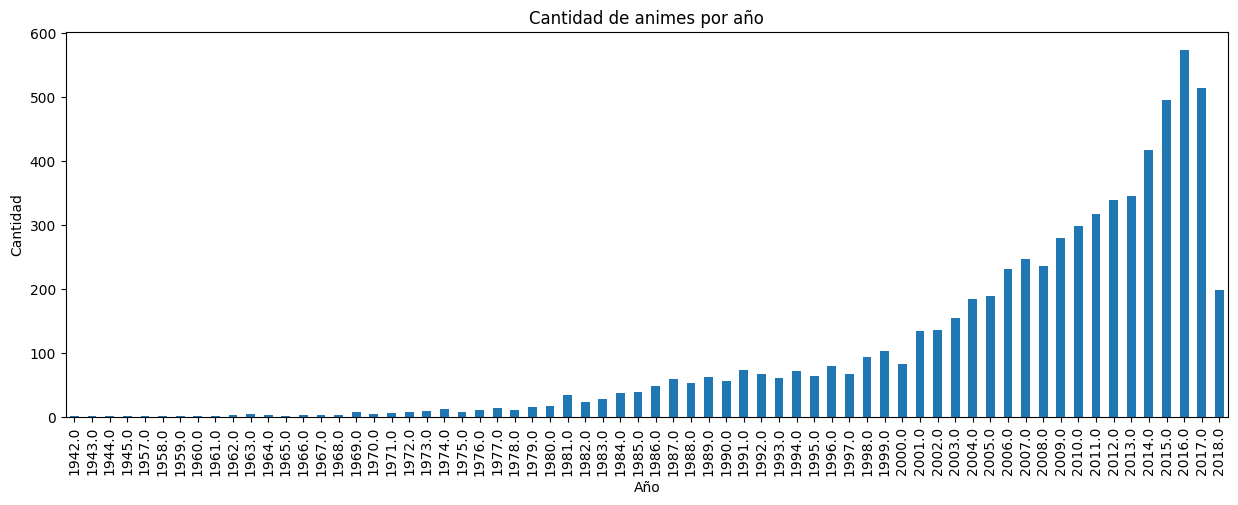

In [275]:
# Agrupar por aired_from_year y contar
anime_cleaned.groupby("aired_from_year").size().plot.bar(xlabel="Año", ylabel="Cantidad", title="Cantidad de animes por año", figsize=(15, 5))

En el gráfico se aprecia el explosivo crecimiento que el anime ha tenido en los años 2000, y notablemente en la década del 2010.
Se puede también obtener un gráfico de los géneros más populares en periodos de 2 años (es dificil ver las diferencias en un gráfico año a año)

<AxesSubplot: title={'center': '3 géneros más populares por intervalos de 2 años'}, xlabel='Intervalo', ylabel='Cantidad'>

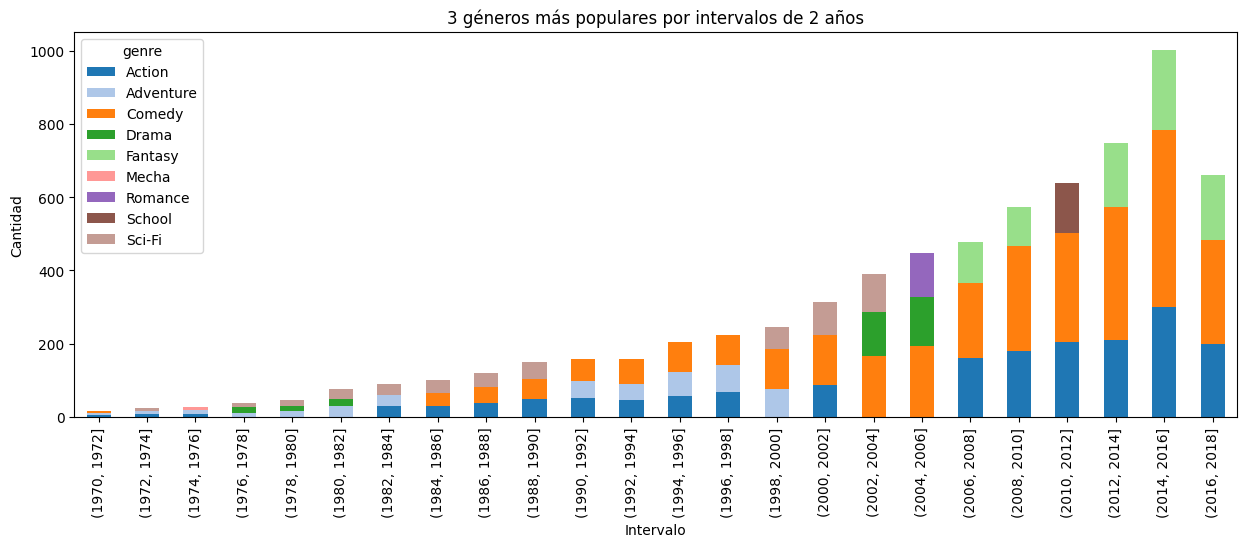

In [283]:
# Se separan los generos primero en filas distintas y luego se pasan a columnas para poder graficarlas.
anime_genres = anime_cleaned["genre"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).rename("genre")
anime_genres = anime_cleaned.drop("genre", axis=1).join(anime_genres)
anime_genres = anime_genres.groupby(["aired_from_year", "genre"]).size().unstack()
# Se agrupan por cada 2 años, partiendo en 1960. Se ignoran los que vienen antes pues son muy pocos datos y no se aprecian en el gráfico
# (como se puede ver en el gráfico de cantidad de animes por año).
anime_genres = anime_genres.groupby(pd.cut(anime_genres.index, np.arange(1970, 2020, 2))).sum()

# Obtenemos los 3 más populares por año, el resto se quedará como NaN
anime_genres = anime_genres.apply(lambda x: x.nlargest(3), axis=1)

# Plot
colormap = plt.cm.tab20
colors = [colormap(i) for i in np.linspace(0.0, 1.0, 15)]
anime_genres.plot.bar(stacked=True, xlabel="Intervalo", ylabel="Cantidad", title="3 géneros más populares por intervalos de 2 años", figsize=(15, 5), color=colors)


De esto se puede apreciar que los generos de acción y comedia están consistentemente en el top 3 de géneros en cada intervalo de tiempo, lo que explica su distribución en los gráficos anteriores. Hay años en donde esto cambia, y hacen su aparición géneros como drama, romance y sci-fi.

Otro análisis interesante de hacer es el de la composición de usuarios del sitio. Se pueden dividir en diversas variables como género, nacionalidad y rangos etarios:

In [387]:
# Se separan los usuarios por gender
genders = users_cleaned['gender'].value_counts()
# Se separan los usuarios por location
locations = users_cleaned['location'].value_counts()

In [385]:
# Calculate age from birth date
users_cleaned['age'] = pd.to_datetime('today').year - pd.to_datetime(users_cleaned['birth_date']).dt.year
users_cleaned.head()

# Se separan los usuarios por edad
# Promedio y mediana de edad
print("Promedio de edad: ", users_cleaned['age'].mean())
print("Mediana de edad: ", users_cleaned['age'].median())

Promedio de edad:  29.125819834239405
Mediana de edad:  29.0


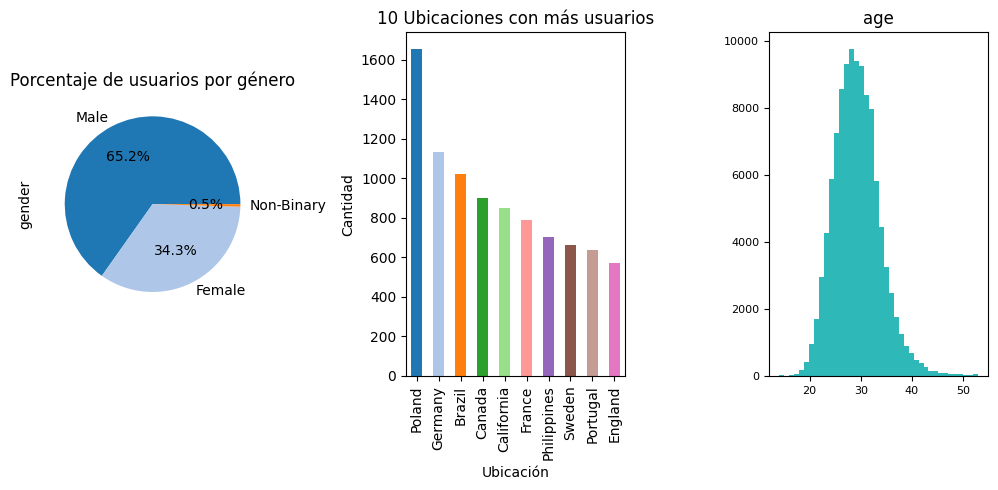

In [386]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))
genders.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), title="Porcentaje de usuarios por género", ax=ax1, colors=colors)
locations.head(10).plot(kind='bar', xlabel="Ubicación", ylabel="Cantidad", title="10 Ubicaciones con más usuarios", figsize=(10, 5), ax=ax2, color=colors)
users_cleaned.hist(column='age', bins=40, xlabelsize=8, ylabelsize=8, figsize=(10, 5), color='#2EB8B8', grid=False, ax=ax3)
plt.tight_layout()

Se puede apreciar que la mayoría de usuarios son hombres (65.2%), el país con más usuarios es Polonia, seguido de Alemania y Brasil, y que la media y mediana de edad es 29 años.
Pueden surgir, de estos datos y los anteriores mostrados, la pregunta de si existen relaciones entre las características demográficas de los usuarios y las estadísticas de popularidad de los animes por género o por año.

## Propuestas
A partir de los datos expuestos, se pueden hacer las siguientes preguntas:
- ¿Existe alguna relación entre las características de un anime y su popularidad (digase, por ejemplo, el slot de tiempo en que es emitido)?
- ¿Existe alguna relación entre las características de un usuario y los tipos de anime que más ve?
- ¿Existe alguna relación entre las características de un usuario y la puntuación que le pone a ciertos animes o géneros?
- ¿Es posible clasificar a los usuarios para poder recomendarles un anime que pueda ser de su agrado?
- ¿Es posible clasificar a los animes de forma de poder predecir su popularidad en un grupo objetivo de usuarios?

Responder estas preguntas presenta algunos desafíos, principalmente si se trata de clasificar series pues la cantidad de columnas que estas tienen da lugar a que pueda haber una gran variación según cada uno de los distintos parámetros. Es necesario descubrir cómo se relacionan estos parámetros con las medidas objetivo que se buscan estudiar.
